In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.linalg as la

## Vector/Matrix Operations

In [3]:
a = [1.1, -2.1, 0.0]
b = [2.0, 1.1, -0.5]
print(a + b)

[1.1, -2.1, 0.0, 2.0, 1.1, -0.5]


In [5]:
aarray = array(a)
barray = array(b)
print(aarray+barray)

[ 3.1 -1.  -0.5]


In [6]:
print(a -b) # since this is not array, there is type error

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [7]:
print(aarray-barray) # now it works! 

[-0.9 -3.2  0.5]


In [8]:
v = [1.0, -2.1, 3.0]
print(2.0*v) #again, error

TypeError: can't multiply sequence by non-int of type 'float'

In [9]:
print(2.0*array([1.0, -2.1, 3.0])) #now it works! 

[ 2.  -4.2  6. ]


In [10]:
print (aarray*barray)

[ 2.2  -2.31 -0.  ]


In [11]:
dot(aarray,barray)

-0.11000000000000032

In [12]:
sum(aarray*barray) # dot(aarray,barray) = sum(aarray,barray)

-0.11000000000000032

In [13]:
sx = array([[0., 1.],[1., 0.]])
sz = array([[1., 0.],[0., -1.]])

In [18]:
dot(sx, sz)

array([[ 0., -1.],
       [ 1.,  0.]])

In [19]:
sx*sz # they are not same

array([[ 0.,  0.],
       [ 0., -0.]])

In [20]:
dot(sz, dot(sx, sz))

array([[ 0., -1.],
       [-1.,  0.]])

In [23]:
print(norm(aarray))
print(sqrt(dot(aarray,aarray))) #get same answer 

2.3706539182259396
2.3706539182259396


In [24]:
cross(aarray,barray)

array([1.05, 0.55, 5.41])

In [26]:
array([aarray[1]*barray[2]-barray[1]*aarray[2], -aarray[0]*barray[2] + barray[0]*aarray[2], aarray[0]*barray[1] - aarray[1]*barray[0]])

array([1.05, 0.55, 5.41])

## LU decomposition

In [34]:
A = random.rand(5,5)
b= random.rand(5)
la.solve(A, b)

array([-0.65803862, -0.88832284,  1.51616721,  1.00202952,  0.85170887])

In [44]:
p,l,u=la.lu(A)

In [46]:
dot(p,dot(l,u))

array([[0.64997363, 0.5441527 , 0.72565635, 0.00486522, 0.75629515],
       [0.13841947, 0.39726967, 0.09411607, 0.57995203, 0.3680251 ],
       [0.97155418, 0.35093277, 0.44466444, 0.89675921, 0.28207831],
       [0.5753963 , 0.59486589, 0.48547546, 0.39683115, 0.06329098],
       [0.63394284, 0.29285002, 0.04060046, 0.29808772, 0.80715729]])

In [47]:
A

array([[0.64997363, 0.5441527 , 0.72565635, 0.00486522, 0.75629515],
       [0.13841947, 0.39726967, 0.09411607, 0.57995203, 0.3680251 ],
       [0.97155418, 0.35093277, 0.44466444, 0.89675921, 0.28207831],
       [0.5753963 , 0.59486589, 0.48547546, 0.39683115, 0.06329098],
       [0.63394284, 0.29285002, 0.04060046, 0.29808772, 0.80715729]])

In [54]:
bprime=dot(la.inv(p),b)
y=la.solve(l,bprime)

In [55]:
la.solve(u,y) #same as la.solve(A, b)

array([-0.65803862, -0.88832284,  1.51616721,  1.00202952,  0.85170887])

## Resistor chain circuit

In [46]:
def resistor(N,V0):
    
    b=zeros(N)
    b[0]=V0
    b[1]=V0
    A=zeros((N,N))
    for i in range(N):
        
        jmin = max(0, i-2)   
        jmax = min(N, i+3)   # right most-column
        for j in range(jmin, jmax):
            A[i,j] = -1.0
        if i == 0 or i==N-1:
            A[i,i] = 3.0
        else:
            A[i,i] = 4.0
    return A,b


In [50]:
V0=4.0
N=6
A,b =resistor(N,V0)
print(A)
print(b)
sol=la.solve(A,b)
print(sol)

[[ 3. -1. -1.  0.  0.  0.]
 [-1.  4. -1. -1.  0.  0.]
 [-1. -1.  4. -1. -1.  0.]
 [ 0. -1. -1.  4. -1. -1.]
 [ 0.  0. -1. -1.  4. -1.]
 [ 0.  0.  0. -1. -1.  3.]]
[4. 4. 0. 0. 0. 0.]
[2.98039216 2.74509804 2.19607843 1.80392157 1.25490196 1.01960784]


[[ 3. -1. -1. ...  0.  0.  0.]
 [-1.  4. -1. ...  0.  0.  0.]
 [-1. -1.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4. -1. -1.]
 [ 0.  0.  0. ... -1.  4. -1.]
 [ 0.  0.  0. ... -1. -1.  3.]]

[4. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


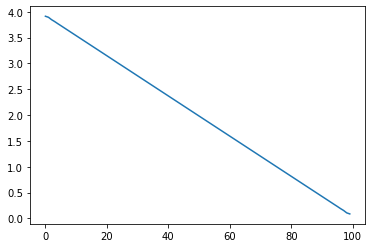

In [51]:
#try N=100, V0=4
N=100
V=4.0
A, b =resistor(N,V0)
sol=la.solve(A, b)
print(A)
print()
print(b)

plot(sol)

In [54]:

N = 10000
V0=4.0
ab = zeros((5, N))
ab[0,2:] = -1.0*ones(N-2)
ab[1,1:] =  -1.0*ones(N-1) 

# diagonal
ab[2] = 4.0*ones(N)
ab[2,0] = 3.0
ab[2,-1] = 3.0
ab[3,:-1] = -1.0*ones(N-1)
ab[4,:-2]= -1.0*ones(N-2)
b=zeros(N)

b[0]=V0
b[1]=V0

In [56]:
sol = la.solve_banded((2,2), ab, b)

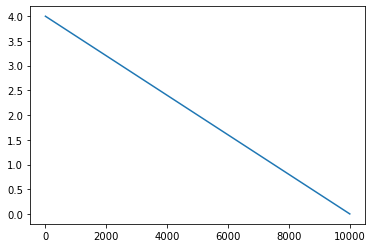

In [57]:
plot(sol)

## Resistor capacitor circuit

In [59]:
# param values
R1 = 1.0
R2 = 2.0
R3 = 1.0
R4 = 2.0
R5 = 1.0
R6 = 2.0

C1 = 0.5
C2 = 1.
V0 = 3.0
w = 1000.0
b=array([V0/R1,V0/R2,V0/R3])
A = array([[(1/R1 + 1/R4 + 1j*w*C1), -1j*w*C1, 0.0], \
          [-1j*w*C1, (1/R2 + 1/R5 + 1j*w*C1 + 1j*w*C2), -1j*w*C2], \
          [0.0, -1j*w*C2, (1/R3 + 1/R6 + 1j*w*C2), ]])
print(A)
print(b)

[[1.5 +500.j 0.  -500.j 0.    +0.j]
 [0.  -500.j 1.5+1500.j 0. -1000.j]
 [0.    +0.j 0. -1000.j 1.5+1000.j]]
[3.  1.5 3. ]


In [60]:
sol=la.solve(A,b)
sol

array([1.66666767-4.99997750e-04j, 1.66666617+4.99999250e-04j,
       1.66666617-1.49994317e-09j])

In [61]:
abs(sol)

array([1.66666774, 1.66666624, 1.66666617])

In [65]:
import cmath

In [66]:
for i in range(len(sol)):
    print(i,cmath.phase(sol[i]))

0 -0.000299998460980728
1 0.0002999996310303771
2 -8.999661728302967e-10


In [67]:
for i in range(len(sol)):
    print(i,cmath.polar(sol[i]))

0 (1.6666677416606954, -0.000299998460980728)
1 (1.6666662416679627, 0.0002999996310303771)
2 (1.666666166670417, -8.999661728302967e-10)


## Eigensystems

In [69]:
A = random.random((8,8))
coeff= poly(A)
roots(coeff)

array([ 4.08359857e+00+0.j        ,  6.28203677e-01+0.18305287j,
        6.28203677e-01-0.18305287j, -3.67880937e-01+0.23254428j,
       -3.67880937e-01-0.23254428j,  3.61096555e-01+0.j        ,
       -5.31803499e-05+0.2731354j , -5.31803499e-05-0.2731354j ])

In [71]:
la.eigvals(A)

array([ 4.08359857e+00+0.j        ,  6.28203677e-01+0.18305287j,
        6.28203677e-01-0.18305287j,  3.61096555e-01+0.j        ,
       -3.67880937e-01+0.23254428j, -3.67880937e-01-0.23254428j,
       -5.31803499e-05+0.2731354j , -5.31803499e-05-0.2731354j ])

## Power method

In [72]:
A = random.random((8,8))
A = A+A.T

In [73]:
la.eigvals(A)

array([ 7.66523528+0.j, -1.57833198+0.j,  1.70729752+0.j,  1.28915817+0.j,
       -0.6521214 +0.j,  0.1936747 +0.j, -0.10042395+0.j, -0.30172712+0.j])

In [74]:
n = 5
b = random.random(8) 
b =b/norm(b)

for i in range(n):
    bs = dot(A, b)
    ev = norm(bs)
    b = bs/ev
ev

7.665234188452238

## Community structure

In [75]:
import networkx as nx

In [77]:
load = nx.read_gml('dolphins.gml')
A=nx.adjacency_matrix(load)

In [78]:
shape(A)

(62, 62)

In [82]:
ki = sum(A, axis=1)
M = sum(A)
B = A - 0.5*outer(ki, ki)/M

x,y=la.eigh(B)

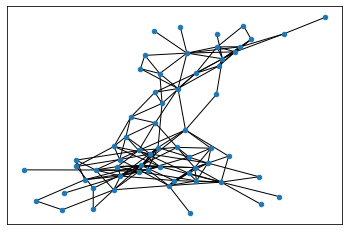

In [98]:
nx.draw_networkx(load,node_size=20 ,with_labels=False,  cmap='coolwarm')

## Normal modes of protein

In [88]:
from mpl_toolkits.mplot3d import Axes3D

In [89]:
Cs = genfromtxt('1rev_CAs.txt', delimiter=',')

shape(Cs)

(936, 3)

In [90]:
import scipy.spatial.distance as dist 

In [92]:
rc=7.0
drs = dist.pdist(Cs)

In [93]:
Vs = zeros((len(Cs), len(Cs)))
ii = triu_indices(len(Cs),1)
drs[drs > rc] = 0.0
drs[drs <= rc] = -1.0
Vs[ii] = drs
Vs += Vs.T

k = -1.0*sum(Vs, axis=1)
Vs[diag_indices(len(Vs))] = k

x, y = eigh(Vs)
x[:5]

array([-1.78737025e-11,  9.36000000e+02,  9.36000000e+02,  9.36000000e+02,
        9.36000000e+02])

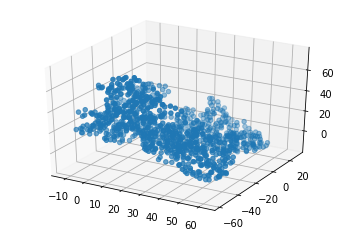

In [97]:
fig = figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cs[:,0], Cs[:,1], Cs[:,2])